In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from itertools import chain
warnings.filterwarnings("ignore")

In [2]:
# import Dataset
df = pd.read_excel("D:\\1 Research Project\\Afraa Paper\\Python_1.xlsx",skiprows=[1])

# Print data shape
print ("Database Shape:{}".format(df.shape))

Database Shape:(1868, 47)


In [3]:
# some sample datas
df.head(5)

,ID,File,type,w/c,a/c,c,cem,fc28,E28,Geometry,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,4,e_005_04,Autogenous,188.8,1814.08,320.0,R,16.5,20000,C 102x356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,e_005_05,Total,188.8,1814.08,320.0,R,NaN,NaN,C 102x356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,e_005_06,Total,188.8,1814.08,320.0,R,NaN,NaN,C 102x356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,e_005_07,Total,188.8,1814.08,320.0,R,NaN,NaN,C 102x356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,e_005_08,Total,188.8,1814.08,320.0,R,NaN,NaN,C 102x356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dataset has both categorical & numerical variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1868 non-null   int64  
 1   File           1868 non-null   object 
 2   type           1641 non-null   object 
 3   w/c            1868 non-null   object 
 4   a/c            1785 non-null   float64
 5   c              1702 non-null   float64
 6   cem            1776 non-null   object 
 7   fc28           1369 non-null   object 
 8   E28            907 non-null    object 
 9   Geometry       1807 non-null   object 
 10  r              1803 non-null   object 
 11  b              149 non-null    float64
 12  h              1803 non-null   float64
 13  V/S            1800 non-null   float64
 14  H0             1515 non-null   float64
 15  t_dry          1818 non-null   float64
 16  T              1716 non-null   float64
 17  RH_test        1700 non-null   float64
 18  avg_shri

In [5]:
df.columns

Index(['ID', 'File', 'type', 'w/c', 'a/c', 'c', 'cem', 'fc28', 'E28',
       'Geometry', 'r', 'b', 'h', 'V/S', 'H0', 't_dry', 'T', 'RH_test',
       'avg_shrinkage', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46'],
      dtype='object')

In [7]:
# creating a copy of the dataset
df_main = df.copy()
df_main = df_main[['w/c', 'a/c', 'c', 'fc28', 
        'Geometry', 'V/S', 'H0', 't_dry', 'T','RH_test', 'avg_shrinkage']]

print(df_main.shape)

(1868, 11)


In [8]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   w/c            1868 non-null   object 
 1   a/c            1785 non-null   float64
 2   c              1702 non-null   float64
 3   fc28           1369 non-null   object 
 4   Geometry       1807 non-null   object 
 5   V/S            1800 non-null   float64
 6   H0             1515 non-null   float64
 7   t_dry          1818 non-null   float64
 8   T              1716 non-null   float64
 9   RH_test        1700 non-null   float64
 10  avg_shrinkage  1834 non-null   float64
dtypes: float64(8), object(3)
memory usage: 160.7+ KB


In [9]:
# deleting nulls and spaces
delete = [" "]
df_main = df_main[~df_main.isin(delete)]

In [10]:
# converting data types of some features
convert_dict = {'w/c': float, 
                'fc28': float,
                'Geometry':str
               }
df_main = df_main.astype(convert_dict)

df_main = df_main.dropna(axis=0)
print(df_main.shape)

(1040, 11)


In [11]:
# label encoding categorical features
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
 
#df_main[['Cem']]= le.fit_transform(df_main[['Cem']]) 
df_main[['Geometry']]= le.fit_transform(df_main[['Geometry']])

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler()

y = df_main["avg_shrinkage"]
X = df_main.drop(["avg_shrinkage"],axis=1)
X_scaled = pd.DataFrame(scaler.fit_transform(X),  index=X.index, columns=X.columns)

y = pd.DataFrame(df_main['avg_shrinkage'])
y_scaled=scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled,index=y.index, columns=y.columns )
train_X, test_X, train_Y, test_Y = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=5)

In [12]:
df.iloc[train_X.index].to_csv("train_dataset_without_type.csv")

In [13]:
df.iloc[test_X.index].to_csv("test_dataset_without_type.csv")

### Importing ML model libraries

In [13]:
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

# Regressors
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


In [23]:
!pip install xgboost

In [30]:
!pip3 install catboost

In [14]:
import xgboost
from catboost import CatBoostRegressor

### All Regression Models

In [15]:
ESTIMATORS = {
    "ETR": ExtraTreesRegressor(),
    "LSVR" : LinearSVR(),
    "KNN": KNeighborsRegressor(),
    "LR1": LinearRegression(),
    "RR": RidgeCV(),
    "LR2": Lasso(),
    "EN": ElasticNet(random_state=0),
    "RFR": RandomForestRegressor(),
    "DTR":DecisionTreeRegressor(),
    "GBR" :GradientBoostingRegressor(),
    "AdaB" :AdaBoostRegressor(),
    "XGB" :xgboost.XGBRegressor(),
    "CatB" :CatBoostRegressor(n_estimators=500,learning_rate=0.00001,depth=5,loss_function='RMSE',random_seed = None,bagging_temperature = 0.2,od_type='Iter',metric_period = 25,od_wait=100),
    "BLR" : BayesianRidge(),
}

### Metrics 

In [16]:
def Mae(test, pred):
    mae = 0
    mae = mean_absolute_error(test, pred)
    return mae

def Rmse(test, pred):
    rmse = 0
    mse = 0
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    return rmse


def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

def adjusted_r2(X,y,model):
    adjusted_r2 = (1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))
    return adjusted_r2

def reference_index(df):
    df["rmse_norm"] = (1 - (df["rmse"] - min(df["rmse"])) / (max(df["rmse"]) - min(df["rmse"])))
    df["adjusted_r2_norm"] = (df["adjusted r2"] - min(df["adjusted r2"])) / (max(df["adjusted r2"]) - min(df["adjusted r2"]))
    df["mae_norm"] = (1- (df["mae"] - min(df["mae"])) / (max(df["mae"]) - min(df["mae"])))
    df["smape_norm"] = (1 - (df["smape"] - min(df["smape"])) / (max(df["smape"]) - min(df["smape"])))
    df["ref_idx"] = (df[['rmse_norm','adjusted_r2_norm', 'mae_norm', 'smape_norm']].sum(axis=1))/4
    ref_idx = df["ref_idx"]
    return ref_idx

### Train

In [17]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()

y_predict = dict()
y_predict["True train Data"] = train_Y.values.ravel()
#Loop for the kfold
for name, estimator in ESTIMATORS.items():
    model = estimator
    model.fit(train_X,train_Y)
    yPredict = model.predict(train_X)
    y_r2[name] = [model.score(train_X, train_Y)]
    y_rmse[name] = [Rmse(train_Y, yPredict)]
    y_mae[name] = [Mae(train_Y, yPredict)]
    y_adjusted_r2[name] = [adjusted_r2(train_X, train_Y,model)]
    y_smape[name] = [np.absolute(smape(train_Y.values.flatten(), yPredict))]
    y_predict[name] = yPredict
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df["ref_idx"] = reference_index(score_df)
score_df

0:	learn: 0.1497934	total: 155ms	remaining: 1m 17s
25:	learn: 0.1497818	total: 177ms	remaining: 3.23s
50:	learn: 0.1497698	total: 209ms	remaining: 1.84s
75:	learn: 0.1497578	total: 230ms	remaining: 1.28s
100:	learn: 0.1497458	total: 252ms	remaining: 994ms
125:	learn: 0.1497340	total: 272ms	remaining: 808ms
150:	learn: 0.1497222	total: 294ms	remaining: 681ms
175:	learn: 0.1497106	total: 318ms	remaining: 585ms
200:	learn: 0.1496986	total: 338ms	remaining: 503ms
225:	learn: 0.1496868	total: 362ms	remaining: 439ms
250:	learn: 0.1496751	total: 385ms	remaining: 382ms
275:	learn: 0.1496632	total: 405ms	remaining: 329ms
300:	learn: 0.1496514	total: 426ms	remaining: 282ms
325:	learn: 0.1496395	total: 447ms	remaining: 239ms
350:	learn: 0.1496275	total: 468ms	remaining: 199ms
375:	learn: 0.1496159	total: 489ms	remaining: 161ms
400:	learn: 0.1496046	total: 510ms	remaining: 126ms
425:	learn: 0.1495930	total: 531ms	remaining: 92.2ms
450:	learn: 0.1495815	total: 551ms	remaining: 59.9ms
475:	learn: 0.

,r2,rmse,mae,adjusted r2,smape,rmse_norm,adjusted_r2_norm,mae_norm,smape_norm,ref_idx
ETR,0.963946,0.028443,0.007961,0.963507,1.060492,1.000000,1.000000,1.000000,1.000000,1.000000
LSVR,0.286892,0.126494,0.091541,0.278206,12.914386,0.192000,0.999186,0.215773,0.402127,0.452271
KNN,0.714500,0.080038,0.055382,0.711023,20.887254,0.574826,0.999700,0.555055,0.000000,0.532395
LR1,0.317879,0.123716,0.093629,0.309571,18.168162,0.214899,0.999223,0.196179,0.137142,0.386861
RR,0.317830,0.123720,0.093597,0.309521,18.132757,0.214862,0.999223,0.196480,0.138928,0.387373
LR2,0.000000,0.149794,0.114537,-0.012180,15.745702,0.000000,0.998841,0.000000,0.259324,0.314541
EN,0.000000,0.149794,0.114537,-0.012180,15.745702,0.000000,0.998841,0.000000,0.259324,0.314541
RFR,0.931226,0.039283,0.024922,0.930389,3.844267,0.910670,0.999961,0.840859,0.859595,0.902771
DTR,0.963946,0.028443,0.007961,0.963507,1.060492,1.000000,1.000000,1.000000,1.000000,1.000000
GBR,0.770855,0.071705,0.054194,0.768064,7.974612,0.643496,0.999768,0.566197,0.651273,0.715184


In [23]:
score_df.to_csv("train_metric_scores_without_type.csv")

### KFold Cross Validation

In [18]:
#Code for model training with Kfold crossvalidation technique
from sklearn.model_selection import KFold, RepeatedKFold
skf = KFold(n_splits=10, shuffle=True)

y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()

score_r2 = dict()
score_rmse = dict()
score_mae = dict()
score_adjr2 = dict()
score_smape = dict()

#Loop for the kfold
for name, estimator in ESTIMATORS.items():
    model = estimator
    n_score_r2 = []
    n_score_rmse = []
    n_score_mae = []
    n_score_adjr2 = []
    n_score_smape = []
    for train_index, val_index in skf.split(train_X, train_Y):
        CV_train_X, CV_test_X = train_X.iloc[train_index], train_X.iloc[val_index]
        CV_train_Y, CV_test_Y = train_Y.iloc[train_index], train_Y.iloc[val_index]
        history = model.fit(CV_train_X, CV_train_Y.values.ravel())

        yPredict1 = model.predict(CV_test_X)

        n_score_r2.append(model.score(CV_test_X, CV_test_Y))
        n_score_rmse.append(Rmse(CV_test_Y, yPredict1))
        n_score_mae.append(Mae(CV_test_Y, yPredict1))
        n_score_smape.append(smape(CV_test_Y.values.flatten(), yPredict1))
        n_score_adjr2.append(adjusted_r2(CV_test_X, CV_test_Y,model))
        
    score_r2[name] = [n_score_r2]
    score_rmse[name] = [n_score_rmse]
    score_mae[name] = [n_score_mae]
    score_adjr2[name] = [n_score_adjr2]
    score_smape[name] = [n_score_smape]

    
    y_r2[name] = [np.mean(np.absolute(n_score_r2))]
    y_rmse[name] = [np.mean(np.absolute(n_score_rmse))]
    y_mae[name] = [np.mean(np.absolute(n_score_mae))]
    y_adjusted_r2[name] = [np.mean(np.absolute(n_score_adjr2))]
    y_smape[name] = [np.mean(np.absolute(n_score_smape))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df["ref_idx"] = reference_index(score_df)
score_df

0:	learn: 0.1483790	total: 1.19ms	remaining: 594ms
25:	learn: 0.1483681	total: 24.7ms	remaining: 450ms
50:	learn: 0.1483567	total: 47.1ms	remaining: 415ms
75:	learn: 0.1483455	total: 67.6ms	remaining: 377ms
100:	learn: 0.1483339	total: 88ms	remaining: 348ms
125:	learn: 0.1483229	total: 108ms	remaining: 319ms
150:	learn: 0.1483116	total: 128ms	remaining: 295ms
175:	learn: 0.1483005	total: 148ms	remaining: 272ms
200:	learn: 0.1482895	total: 169ms	remaining: 251ms
225:	learn: 0.1482780	total: 189ms	remaining: 229ms
250:	learn: 0.1482671	total: 212ms	remaining: 210ms
275:	learn: 0.1482560	total: 234ms	remaining: 190ms
300:	learn: 0.1482450	total: 255ms	remaining: 169ms
325:	learn: 0.1482339	total: 278ms	remaining: 148ms
350:	learn: 0.1482225	total: 300ms	remaining: 127ms
375:	learn: 0.1482115	total: 322ms	remaining: 106ms
400:	learn: 0.1482006	total: 343ms	remaining: 84.6ms
425:	learn: 0.1481898	total: 363ms	remaining: 63.1ms
450:	learn: 0.1481788	total: 383ms	remaining: 41.6ms
475:	learn:

499:	learn: 0.1515330	total: 419ms	remaining: 0us
0:	learn: 0.1505304	total: 1.17ms	remaining: 586ms
25:	learn: 0.1505184	total: 22.7ms	remaining: 413ms
50:	learn: 0.1505058	total: 43.3ms	remaining: 381ms
75:	learn: 0.1504933	total: 63.4ms	remaining: 354ms
100:	learn: 0.1504806	total: 84.1ms	remaining: 332ms
125:	learn: 0.1504682	total: 104ms	remaining: 309ms
150:	learn: 0.1504559	total: 124ms	remaining: 288ms
175:	learn: 0.1504439	total: 145ms	remaining: 267ms
200:	learn: 0.1504316	total: 166ms	remaining: 247ms
225:	learn: 0.1504191	total: 186ms	remaining: 226ms
250:	learn: 0.1504069	total: 209ms	remaining: 207ms
275:	learn: 0.1503949	total: 231ms	remaining: 187ms
300:	learn: 0.1503828	total: 251ms	remaining: 166ms
325:	learn: 0.1503703	total: 272ms	remaining: 145ms
350:	learn: 0.1503579	total: 293ms	remaining: 124ms
375:	learn: 0.1503455	total: 314ms	remaining: 103ms
400:	learn: 0.1503334	total: 334ms	remaining: 82.6ms
425:	learn: 0.1503212	total: 355ms	remaining: 61.6ms
450:	learn: 

,r2,rmse,mae,adjusted r2,smape,rmse_norm,adjusted_r2_norm,mae_norm,smape_norm,ref_idx
ETR,0.666306,0.083839,0.055943,0.620077,8.248524,1.000000,0.005050,1.000000,1.000000,0.751263
LSVR,0.267805,0.126320,0.093327,0.167111,13.143810,0.353891,0.000252,0.363428,0.348494,0.266516
KNN,0.520266,0.102028,0.071686,0.453788,10.471355,0.723349,0.003289,0.731922,0.704167,0.540682
LR1,0.274364,0.125539,0.095128,0.186414,13.390521,0.365764,0.000456,0.332747,0.315659,0.253657
RR,0.287841,0.125564,0.094806,0.189188,13.351862,0.365391,0.000486,0.338237,0.320804,0.256230
LR2,0.009861,0.149588,0.114669,0.149738,15.762320,0.000000,0.000068,0.000000,0.000000,0.000017
EN,0.004253,0.148831,0.114580,0.143349,15.751323,0.011519,0.000000,0.001518,0.001464,0.003625
RFR,0.663140,0.085351,0.059363,0.616463,8.697237,0.977007,0.005012,0.941770,0.940281,0.716017
DTR,0.404238,0.112167,0.073228,0.329563,10.941831,0.569151,0.001973,0.705679,0.641552,0.479589
GBR,0.612433,0.091812,0.067890,0.558753,9.940663,0.878731,0.004401,0.796571,0.774796,0.613624


In [66]:
score_df.to_csv("CV_scores_without_type.csv")

### Test

In [20]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()

y_predict = dict()
y_predict["True Test Data"] = test_Y.values.ravel()
#Loop for the kfold
for name, estimator in ESTIMATORS.items():
    model = estimator
    model.fit(train_X,train_Y)
    yPredict = model.predict(test_X)
    y_r2[name] = [model.score(test_X, test_Y)]
    y_rmse[name] = [Rmse(test_Y, yPredict)]
    y_mae[name] = [Mae(test_Y, yPredict)]
    y_adjusted_r2[name] = [adjusted_r2(test_X, test_Y,model)]
    y_smape[name] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
    y_predict[name] = yPredict
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df["ref_idx"] = reference_index(score_df)
score_df

0:	learn: 0.1497934	total: 1.28ms	remaining: 637ms
25:	learn: 0.1497818	total: 25.5ms	remaining: 465ms
50:	learn: 0.1497698	total: 47.2ms	remaining: 416ms
75:	learn: 0.1497578	total: 68.7ms	remaining: 383ms
100:	learn: 0.1497458	total: 89.7ms	remaining: 354ms
125:	learn: 0.1497340	total: 110ms	remaining: 327ms
150:	learn: 0.1497222	total: 132ms	remaining: 304ms
175:	learn: 0.1497106	total: 153ms	remaining: 281ms
200:	learn: 0.1496986	total: 175ms	remaining: 260ms
225:	learn: 0.1496868	total: 199ms	remaining: 241ms
250:	learn: 0.1496751	total: 221ms	remaining: 219ms
275:	learn: 0.1496632	total: 244ms	remaining: 198ms
300:	learn: 0.1496514	total: 265ms	remaining: 175ms
325:	learn: 0.1496395	total: 287ms	remaining: 153ms
350:	learn: 0.1496275	total: 308ms	remaining: 131ms
375:	learn: 0.1496159	total: 329ms	remaining: 109ms
400:	learn: 0.1496046	total: 350ms	remaining: 86.5ms
425:	learn: 0.1495930	total: 372ms	remaining: 64.7ms
450:	learn: 0.1495815	total: 396ms	remaining: 43ms
475:	learn:

,r2,rmse,mae,adjusted r2,smape,rmse_norm,adjusted_r2_norm,mae_norm,smape_norm,ref_idx
ETR,0.787298,0.077099,0.052544,0.776501,8.353292,1.000000,1.000000,1.000000,1.000000,1.000000
LSVR,0.293439,0.140520,0.102230,0.257573,15.082532,0.300880,0.997641,0.313263,0.541922,0.538427
KNN,0.697762,0.091905,0.062816,0.682420,23.043452,0.836791,0.999572,0.858032,0.000000,0.673599
LR1,0.348593,0.134924,0.102366,0.315527,20.424288,0.362568,0.997905,0.311384,0.178294,0.462538
RR,0.347979,0.134987,0.102296,0.314881,20.376633,0.361866,0.997902,0.312346,0.181538,0.463413
LR2,-0.007703,0.167814,0.124895,-0.058855,17.846351,0.000000,0.996203,0.000000,0.353781,0.337496
EN,-0.007703,0.167814,0.124895,-0.058855,17.846351,0.000000,0.996203,0.000000,0.353781,0.337496
RFR,0.776816,0.078976,0.055455,0.765487,8.693387,0.979311,0.999950,0.959770,0.976849,0.978970
DTR,0.642328,0.099978,0.070437,0.624172,11.495957,0.747792,0.999308,0.752691,0.786070,0.821465
GBR,0.723094,0.087969,0.065264,0.709038,10.069778,0.880177,0.999693,0.824192,0.883154,0.896804


In [25]:
score_df.to_csv("test_metric_scores_without_type.csv")

### KFold Test Output on full dataset

In [21]:
all_data = pd.DataFrame()
from sklearn.model_selection import KFold, RepeatedKFold
skf = KFold(n_splits=10, shuffle=True, random_state=5)
y_predict = dict()
data = pd.DataFrame()
dataframe = []
yTrue_list = []

# generating output for each fold
for name, estimator in ESTIMATORS.items():
    data_algo = pd.DataFrame()
    model = estimator
    yPredict_list = []
    for train_index, val_index in skf.split(X_scaled, y_scaled):
        CV_train_X, CV_test_X = X_scaled.iloc[train_index], X_scaled.iloc[val_index]
        CV_train_Y, CV_test_Y = y_scaled.iloc[train_index], y_scaled.iloc[val_index]
        #Fitting the model to train and validate
        history = model.fit(CV_train_X, CV_train_Y.values.ravel())
        y_true = CV_test_Y.values.ravel()
        yTrue_list.append(y_true)
        #Prediction function after training
        yPredict = model.predict(CV_test_X)
        data = pd.DataFrame(yPredict,index=CV_test_X.index)
        data_algo = pd.concat([data, data_algo])
    all_data = pd.concat([all_data, data_algo], axis=1)
    output = pd.DataFrame(scaler.inverse_transform(all_data), index=all_data.index)
    
output.columns = ['ETR','LSVR','KNN','LR1','RR','LR2','EN','RFR','DTR','GBR','AdaB','XGB','CatB','BLR' ]
fold_outputs = pd.merge(df, output, left_index=True, right_index=True)
fold_outputs.head(5)

0:	learn: 0.1496857	total: 1.23ms	remaining: 613ms
25:	learn: 0.1496738	total: 26.5ms	remaining: 483ms
50:	learn: 0.1496619	total: 50.8ms	remaining: 447ms
75:	learn: 0.1496499	total: 71.8ms	remaining: 401ms
100:	learn: 0.1496376	total: 92.7ms	remaining: 366ms
125:	learn: 0.1496258	total: 114ms	remaining: 339ms
150:	learn: 0.1496140	total: 137ms	remaining: 316ms
175:	learn: 0.1496021	total: 158ms	remaining: 290ms
200:	learn: 0.1495898	total: 179ms	remaining: 266ms
225:	learn: 0.1495779	total: 202ms	remaining: 245ms
250:	learn: 0.1495659	total: 223ms	remaining: 221ms
275:	learn: 0.1495541	total: 244ms	remaining: 198ms
300:	learn: 0.1495423	total: 265ms	remaining: 175ms
325:	learn: 0.1495303	total: 287ms	remaining: 153ms
350:	learn: 0.1495184	total: 309ms	remaining: 131ms
375:	learn: 0.1495067	total: 330ms	remaining: 109ms
400:	learn: 0.1494951	total: 352ms	remaining: 86.8ms
425:	learn: 0.1494832	total: 374ms	remaining: 64.9ms
450:	learn: 0.1494710	total: 395ms	remaining: 42.9ms
475:	lear

450:	learn: 0.1529525	total: 404ms	remaining: 43.9ms
475:	learn: 0.1529396	total: 426ms	remaining: 21.5ms
499:	learn: 0.1529271	total: 447ms	remaining: 0us
0:	learn: 0.1540936	total: 1.75ms	remaining: 871ms
25:	learn: 0.1540805	total: 26.1ms	remaining: 476ms
50:	learn: 0.1540674	total: 47.3ms	remaining: 417ms
75:	learn: 0.1540542	total: 68.8ms	remaining: 384ms
100:	learn: 0.1540412	total: 90.2ms	remaining: 356ms
125:	learn: 0.1540281	total: 112ms	remaining: 331ms
150:	learn: 0.1540151	total: 133ms	remaining: 308ms
175:	learn: 0.1540019	total: 155ms	remaining: 285ms
200:	learn: 0.1539884	total: 178ms	remaining: 264ms
225:	learn: 0.1539756	total: 201ms	remaining: 244ms
250:	learn: 0.1539625	total: 223ms	remaining: 221ms
275:	learn: 0.1539493	total: 243ms	remaining: 198ms
300:	learn: 0.1539366	total: 265ms	remaining: 175ms
325:	learn: 0.1539232	total: 286ms	remaining: 153ms
350:	learn: 0.1539100	total: 307ms	remaining: 130ms
375:	learn: 0.1538969	total: 328ms	remaining: 108ms
400:	learn: 

,ID,File,type,w/c,a/c,c,cem,fc28,E28,Geometry,...,RR,LR2,EN,RFR,DTR,GBR,AdaB,XGB,CatB,BLR
0,4,e_005_04,Autogenous,188.8,1814.080,320.0,R,16.5,20000,C 102x356,...,-203.603537,-286.733596,-286.733596,-121.647689,-91.374157,-273.336189,-358.732189,-174.310104,-286.256826,-203.559703
7,35,e_015_10,Autogenous,206.7448,1686.864,452.0,RS,45.2,27234,C 76.2x228.6,...,-249.362380,-284.687204,-284.687204,-84.962473,-80.000000,-199.425438,-228.140669,-234.169366,-284.136052,-246.942827
8,36,e_015_11,Autogenous,206.7448,1686.864,452.0,RS,45.2,27234,C 101.6x304.8,...,-210.821397,-284.687204,-284.687204,-83.609781,-80.000000,-161.759395,-228.140669,-170.604804,-284.122447,-209.120704
9,37,e_015_12,Autogenous,206.7448,1686.864,452.0,RS,45.2,27234,C 152.4x457.2,...,-172.740797,-281.815774,-281.815774,-64.072586,-60.200000,-175.669401,-195.005298,-62.207212,-281.193411,-172.254233
10,41,e_015_16,Autogenous,206.7448,1686.864,452.0,RS,45.2,27234,P 76.2x152.4x304.8,...,-243.564964,-283.691851,-283.691851,-76.694342,-60.200000,-78.833748,-207.920507,-19.775548,-283.170747,-242.230945


In [23]:
fold_outputs.to_csv("full_dataset_outputs_without_type.csv", index=False)

## Best Performing models

### Extra Tree Regressor

In [28]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()


model = ExtraTreesRegressor()
model.fit(train_X,train_Y)
yPredict = model.predict(test_X)
y_r2["ETR"] = [model.score(test_X, test_Y)]
y_rmse["ETR"] = [Rmse(test_Y, yPredict)]
y_mae["ETR"] = [Mae(test_Y, yPredict)]
y_adjusted_r2["ETR"] = [adjusted_r2(test_X, test_Y,model)]
y_smape["ETR"] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df

,r2,rmse,mae,adjusted r2,smape
ETR,0.78649,0.077245,0.052029,0.775652,8.375275


In [29]:
import shap


In [ ]:
import shap
model_explainer = shap.KernelExplainer(model.predict,train_X)
model_shap_values = model_explainer.shap_values(train_X)

Using 832 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/832 [00:00<?, ?it/s]

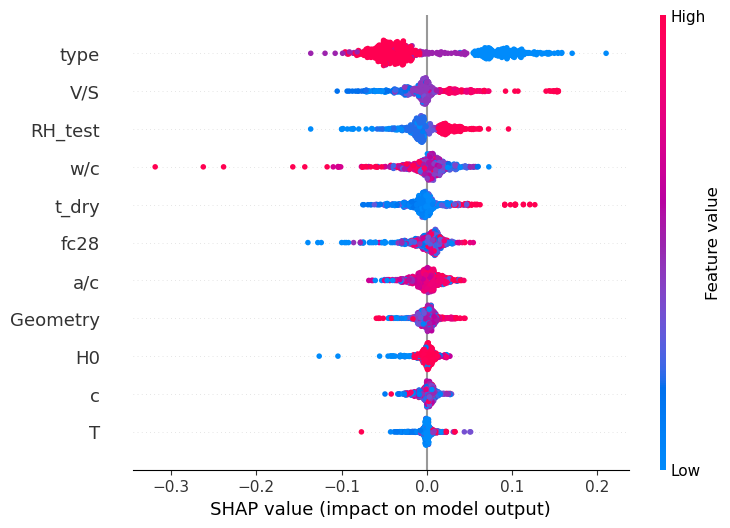

In [23]:
shap.summary_plot(model_shap_values, train_X)

In [30]:
import shap
model_explainer = shap.KernelExplainer(model.predict,test_X)
model_shap_values = model_explainer.shap_values(test_X)

Using 208 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/208 [00:00<?, ?it/s]

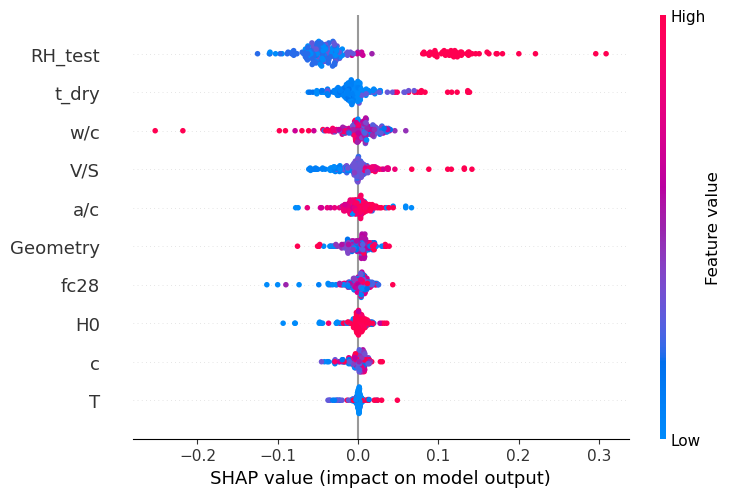

In [31]:
shap.summary_plot(model_shap_values, test_X)

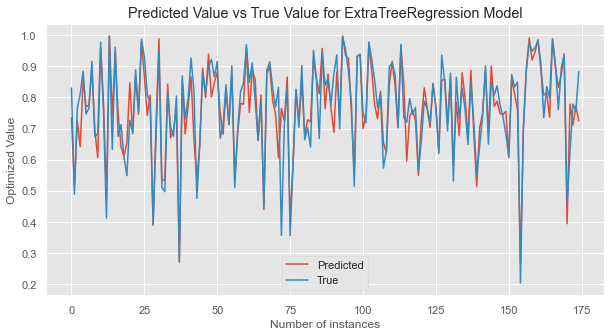

In [34]:
#Plotting a graph to compare results
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(yPredict)
plt.plot(list(test_Y.values))
plt.title("Predicted Value vs True Value for ExtraTreeRegression Model")
plt.ylabel("Optimized Value")
plt.xlabel('Number of instances')
plt.legend(["Predicted","True"], loc="lower center")
plt.show()

Text(0.5, 1.0, 'Error Distribution for ETR')

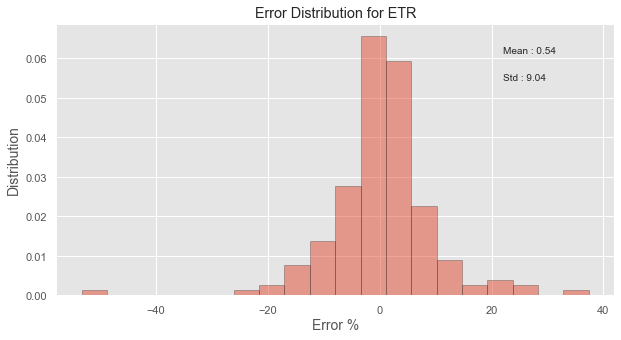

In [35]:
output=pd.DataFrame()
output["true"]=test_Y.values.flatten()
output["predicted"]=yPredict
output["error_percentage"] = ((output["true"] - output["predicted"])/output["predicted"])*100

fig, ax = plt.subplots(figsize=(10, 5))
data = output["error_percentage"]
_, bins, _ = plt.hist(data, 20,edgecolor="black", density=1, alpha=0.5)
plt.xlabel("Error %", fontsize=14)
plt.ylabel("Distribution", fontsize=14)
text1 = f"Mean : {round(np.mean(output['error_percentage']),2)}"
text2 = f"Std : {round(np.std(output['error_percentage']),2)}"
plt.text(0.8, 0.9,text1 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.text(0.8, 0.8,text2 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.title("Error Distribution for ETR")

### XGB Regressor

In [32]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()


model = xgboost.XGBRegressor()
model.fit(train_X,train_Y)
yPredict = model.predict(test_X)
y_r2["XGB"] = [model.score(test_X, test_Y)]
y_rmse["XGB"] = [Rmse(test_Y, yPredict)]
y_mae["XGB"] = [Mae(test_Y, yPredict)]
y_adjusted_r2["XGB"] = [adjusted_r2(test_X, test_Y,model)]
y_smape["XGB"] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df

,r2,rmse,mae,adjusted r2,smape
XGB,0.767181,0.080662,0.057325,0.755363,9.011476


In [33]:
import shap
model_explainer = shap.KernelExplainer(model.predict,test_X)
model_shap_values = model_explainer.shap_values(test_X)

Using 208 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/208 [00:00<?, ?it/s]

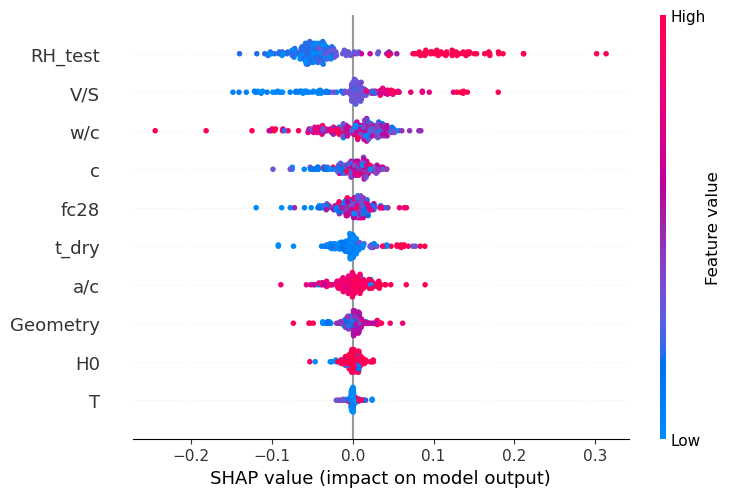

In [34]:
shap.summary_plot(model_shap_values, test_X)

### Random Forest Regressor

In [35]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()


model = RandomForestRegressor()
model.fit(train_X,train_Y)
yPredict = model.predict(test_X)
y_r2["RFR"] = [model.score(test_X, test_Y)]
y_rmse["RFR"] = [Rmse(test_Y, yPredict)]
y_mae["RFR"] = [Mae(test_Y, yPredict)]
y_adjusted_r2["RFR"] = [adjusted_r2(test_X, test_Y,model)]
y_smape["RFR"] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df

,r2,rmse,mae,adjusted r2,smape
RFR,0.770862,0.080022,0.055825,0.759231,8.734042


In [36]:
import shap
model_explainer = shap.KernelExplainer(model.predict,test_X)
model_shap_values = model_explainer.shap_values(test_X)

Using 208 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/208 [00:00<?, ?it/s]

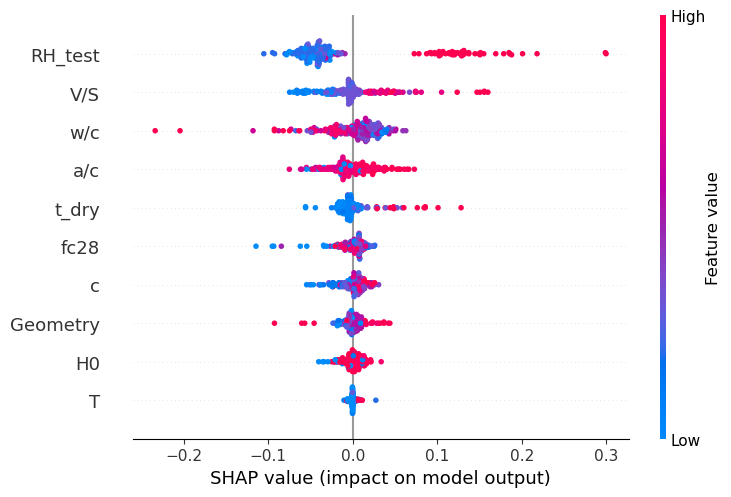

In [37]:
shap.summary_plot(model_shap_values, test_X)

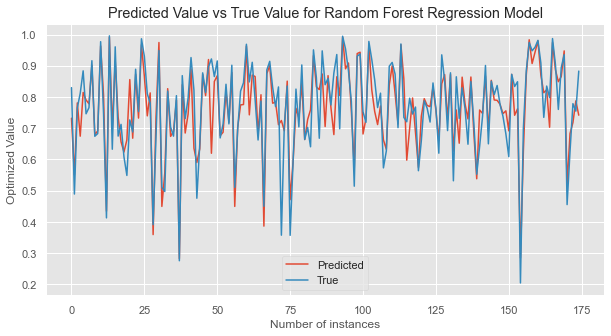

In [37]:
#Plotting a graph to compare results
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(yPredict)
plt.plot(list(test_Y.values))
plt.title("Predicted Value vs True Value for Random Forest Regression Model")
plt.ylabel("Optimized Value")
plt.xlabel('Number of instances')
plt.legend(["Predicted","True"], loc="lower center")
plt.show()

Text(0.5, 1.0, 'Error Distribution for RFR')

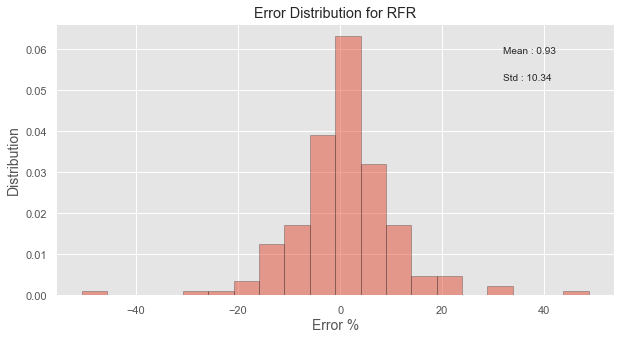

In [38]:
output=pd.DataFrame()
output["true"]=test_Y.values.flatten()
output["predicted"]=yPredict
output["error_percentage"] = ((output["true"] - output["predicted"])/output["predicted"])*100

fig, ax = plt.subplots(figsize=(10, 5))
data = output["error_percentage"]
_, bins, _ = plt.hist(data, 20,edgecolor="black", density=1, alpha=0.5)
plt.xlabel("Error %", fontsize=14)
plt.ylabel("Distribution", fontsize=14)
text1 = f"Mean : {round(np.mean(output['error_percentage']),2)}"
text2 = f"Std : {round(np.std(output['error_percentage']),2)}"
plt.text(0.8, 0.9,text1 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.text(0.8, 0.8,text2 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.title("Error Distribution for RFR")

### Decision Tree Regressor

In [32]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()


model = DecisionTreeRegressor()
model.fit(train_X,train_Y)
yPredict = model.predict(test_X)
y_r2["DTR"] = [model.score(test_X, test_Y)]
y_rmse["DTR"] = [Rmse(test_Y, yPredict)]
y_mae["DTR"] = [Mae(test_Y, yPredict)]
y_adjusted_r2["DTR"] = [adjusted_r2(test_X, test_Y,model)]
y_smape["DTR"] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df

,r2,rmse,mae,adjusted r2,smape
DTR,0.520555,0.100736,0.061726,0.495584,9.267196


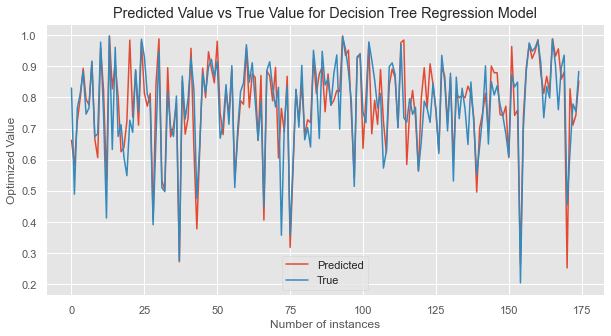

In [40]:
#Plotting a graph to compare results
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(yPredict)
plt.plot(list(test_Y.values))
plt.title("Predicted Value vs True Value for Decision Tree Regression Model")
plt.ylabel("Optimized Value")
plt.xlabel('Number of instances')
plt.legend(["Predicted","True"], loc="lower center")
plt.show()

Text(0.5, 1.0, 'Error Distribution for DTR')

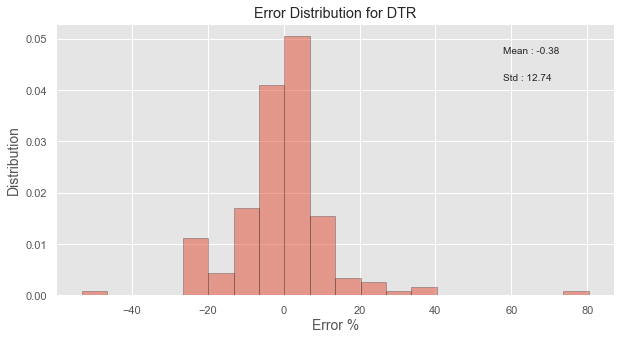

In [41]:
output=pd.DataFrame()
output["true"]=test_Y.values.flatten()
output["predicted"]=yPredict
output["error_percentage"] = ((output["true"] - output["predicted"])/output["predicted"])*100

fig, ax = plt.subplots(figsize=(10, 5))
data = output["error_percentage"]
_, bins, _ = plt.hist(data, 20,edgecolor="black", density=1, alpha=0.5)
plt.xlabel("Error %", fontsize=14)
plt.ylabel("Distribution", fontsize=14)
text1 = f"Mean : {round(np.mean(output['error_percentage']),2)}"
text2 = f"Std : {round(np.std(output['error_percentage']),2)}"
plt.text(0.8, 0.9,text1 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.text(0.8, 0.8,text2 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.title("Error Distribution for DTR")

### Gradient Boosting Regression

In [33]:
y_rmse = dict()
y_r2 = dict()
y_mae = dict()
y_adjusted_r2 = dict()
y_smape = dict()


model = GradientBoostingRegressor()
model.fit(train_X,train_Y)
yPredict = model.predict(test_X)
y_r2["GBR"] = [model.score(test_X, test_Y)]
y_rmse["GBR"] = [Rmse(test_Y, yPredict)]
y_mae["GBR"] = [Mae(test_Y, yPredict)]
y_adjusted_r2["GBR"] = [adjusted_r2(test_X, test_Y,model)]
y_smape["GBR"] = [np.absolute(smape(test_Y.values.flatten(), yPredict))]
        
df_rmse = pd.DataFrame.from_dict(y_rmse,orient='index',columns=['rmse'])
df_r2 = pd.DataFrame.from_dict(y_r2,orient='index',columns=['r2'])
df_mae = pd.DataFrame.from_dict(y_mae,orient='index',columns=['mae'])
df_adjusted_r2 = pd.DataFrame.from_dict(y_adjusted_r2,orient='index',columns=['adjusted r2'])
df_smape = pd.DataFrame.from_dict(y_smape,orient='index',columns=['smape'])

merge_1 = df_r2.merge(df_rmse, left_index=True, right_index=True, how='inner')
merge_2 = merge_1.merge(df_mae, left_index=True, right_index=True, how='inner')
merge_3 = merge_2.merge(df_adjusted_r2, left_index=True, right_index=True, how='inner')
score_df = merge_3.merge(df_smape, left_index=True, right_index=True, how='inner')
score_df

,r2,rmse,mae,adjusted r2,smape
GBR,0.683953,0.081788,0.062029,0.667492,9.14037


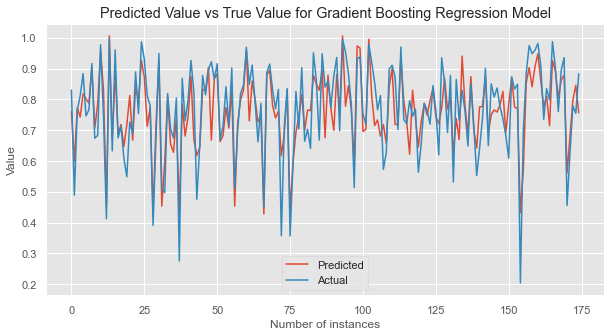

In [43]:
#Plotting a graph to compare results
plt.figure(figsize=(10,5), facecolor='white')
plt.plot(yPredict)
plt.plot(list(test_Y.values))
plt.title("Predicted Value vs True Value for Gradient Boosting Regression Model")
plt.ylabel("Value")
plt.xlabel('Number of instances')
plt.legend(["Predicted","Actual"], loc="lower center")
plt.show()

Text(0.5, 1.0, 'Error Distribution for GBR')

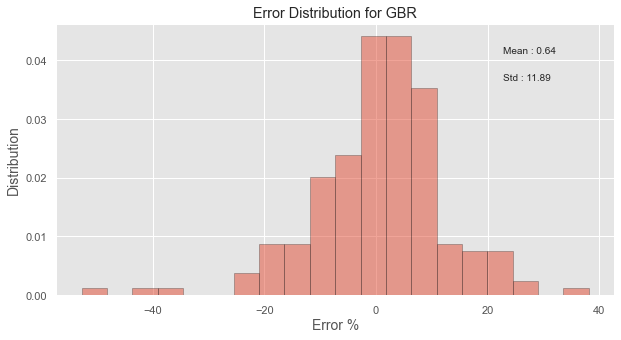

In [44]:
output=pd.DataFrame()
output["true"]=test_Y.values.flatten()
output["predicted"]=yPredict
output["error_percentage"] = ((output["true"] - output["predicted"])/output["predicted"])*100

fig, ax = plt.subplots(figsize=(10, 5))
data = output["error_percentage"]
_, bins, _ = plt.hist(data, 20,edgecolor="black", density=1, alpha=0.5)
plt.xlabel("Error %", fontsize=14)
plt.ylabel("Distribution", fontsize=14)
text1 = f"Mean : {round(np.mean(output['error_percentage']),2)}"
text2 = f"Std : {round(np.std(output['error_percentage']),2)}"
plt.text(0.8, 0.9,text1 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.text(0.8, 0.8,text2 , horizontalalignment='left', verticalalignment='center', transform=ax.transAxes)
plt.title("Error Distribution for GBR")

## True vs Predicted

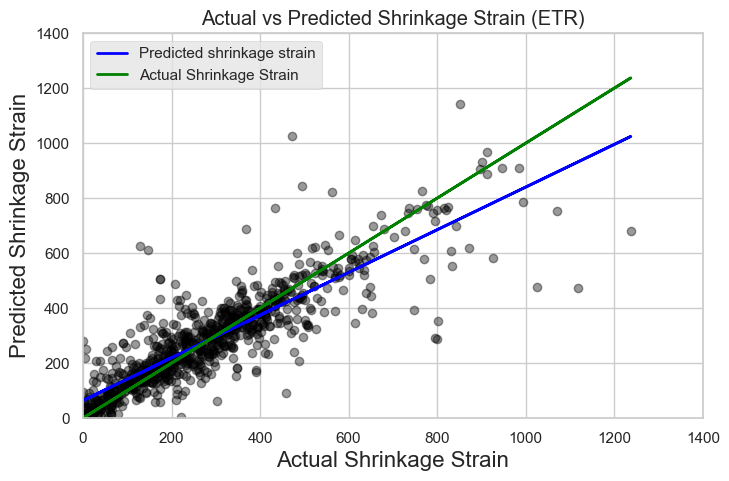

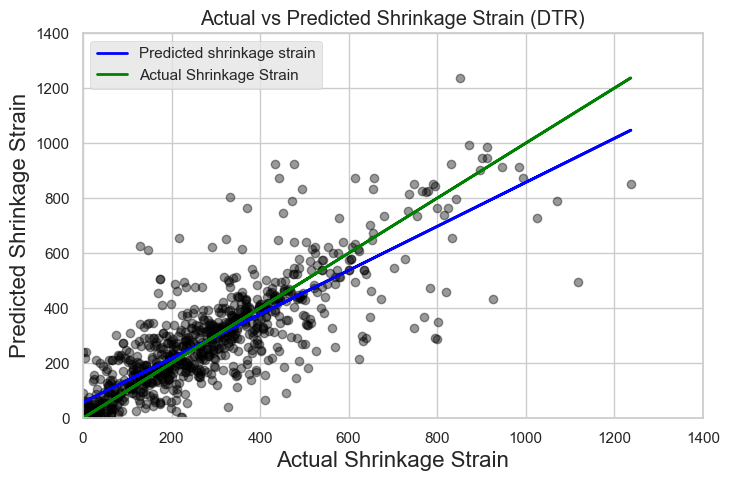

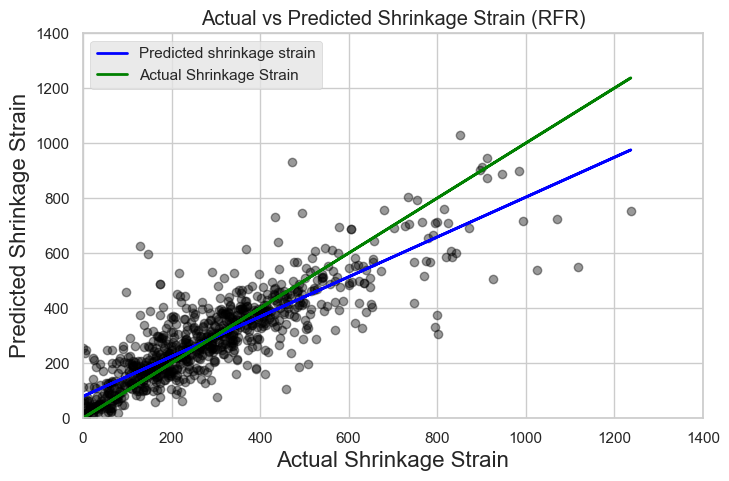

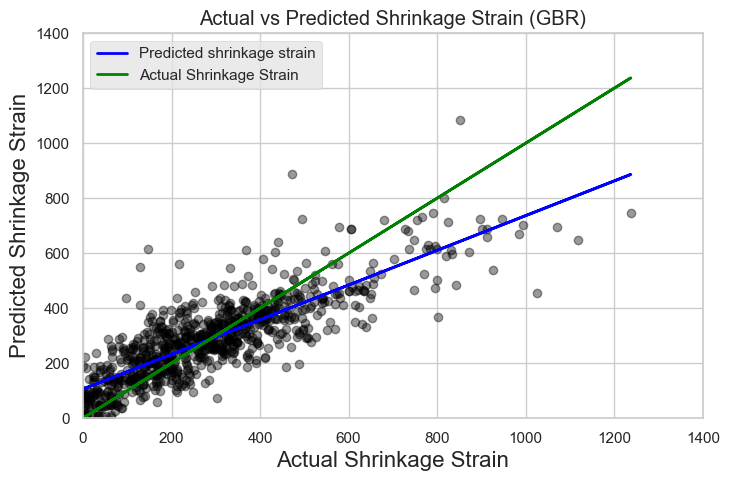

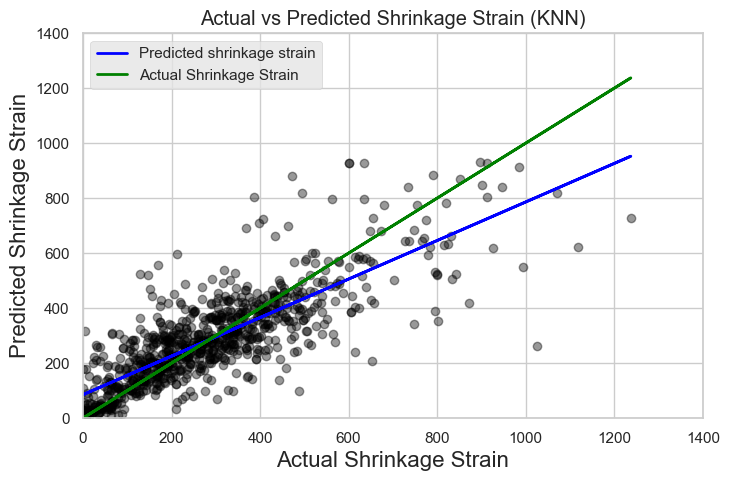

In [35]:
model_list = ["ETR","DTR","RFR","GBR","KNN"]

for i in range(len(model_list)):
    etr = abs(fold_outputs[['avg_shrinkage', model_list[i]]])
    plt.figure(figsize=(8, 5))
    sns.set(style="whitegrid")
    xs = etr["avg_shrinkage"].values
    plt.scatter(x = etr["avg_shrinkage"].values, y = etr[model_list[i]].values, color="black", alpha=0.4)


    m,b = np.polyfit(x = etr["avg_shrinkage"].values, y = etr[model_list[i]].values, deg=1)
    regression_line = [(m*x)+b for x in xs]
    from matplotlib import style
    #style.use('science')
    style.use('ggplot')
    plt.plot(xs, regression_line,color='blue',linewidth=2,
             label=f"Predicted shrinkage strain")

    m2,b2 = np.polyfit(x = etr["avg_shrinkage"].values, y = etr["avg_shrinkage"].values, deg=1)
    regression_line = [(m2*x)+b2 for x in xs]
    from matplotlib import style
    style.use('ggplot')
    plt.plot(xs, regression_line,color='green',linewidth=2,label="Actual Shrinkage Strain")
    
    plt.xlim(0,1400)
    plt.ylim(0,1400)
    plt.xlabel("Actual Shrinkage Strain", fontsize=16)
    plt.ylabel("Predicted Shrinkage Strain",fontsize=16 )
    plt.title(f"Actual vs Predicted Shrinkage Strain ({model_list[i]})")
    plt.legend()
    plt.xticks(np.arange(min(xs), max(xs)+200, 200.0))
    plt.yticks(np.arange(min(xs), max(xs)+200, 200.0))
    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.show()

### Feature Importance

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from xgboost import XGBRegressor

In [45]:
X = df_main.drop(["avg_shrinkage"],axis=1)
Y = df_main["avg_shrinkage"]
ESTIMATORS = {
    "Linear regression": LinearRegression(),
    "ETR regression" : ExtraTreesRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor()
}

fe = dict()
fe["features"] = X.columns
for name, estimator in ESTIMATORS.items():
    model = estimator
    if name == "Linear regression":
        model.fit(X, Y)
        importance = model.coef_
        fe[name] = importance
    else:   
        model.fit(X,y)
        importance = model.feature_importances_
        fe[name] = importance
        
fe = pd.DataFrame(fe)

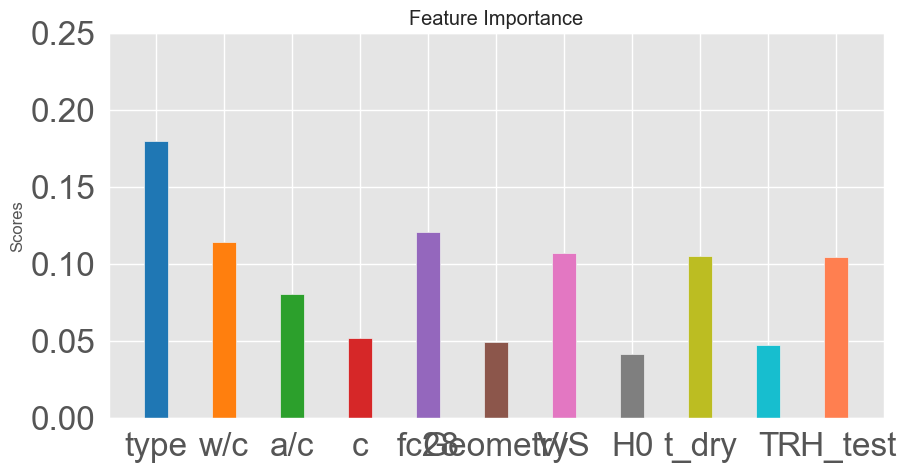

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(fe.features,abs(fe['ETR regression']),width=0.35,
       color=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e377c2',
              '#7f7f7f', '#bcbd22', '#17becf','coral','black'])


ax.set_ylabel('Scores')
plt.ylim(0, 0.25)
plt.title("Feature Importance")
plt.show()

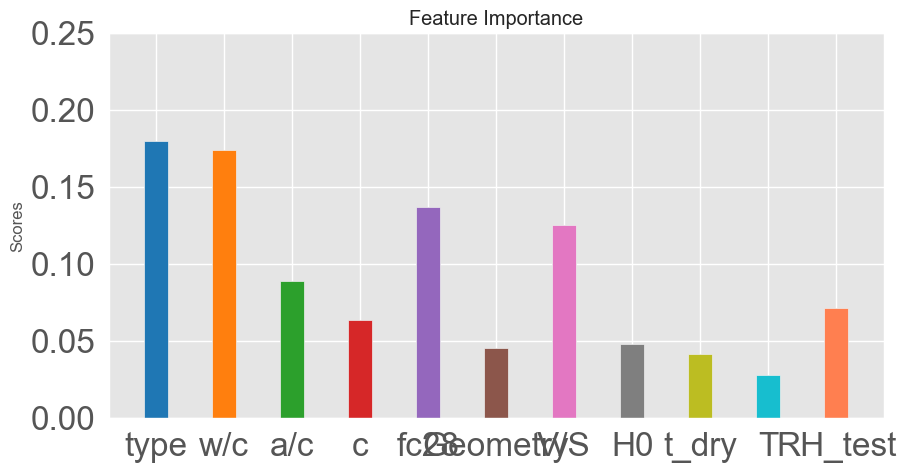

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(fe.features,abs(fe['Random Forest Regressor']),width=0.35,
       color=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e377c2',
              '#7f7f7f', '#bcbd22', '#17becf','coral','black'])


ax.set_ylabel('Scores')
plt.ylim(0, 0.25)
plt.title("Feature Importance")
plt.show()

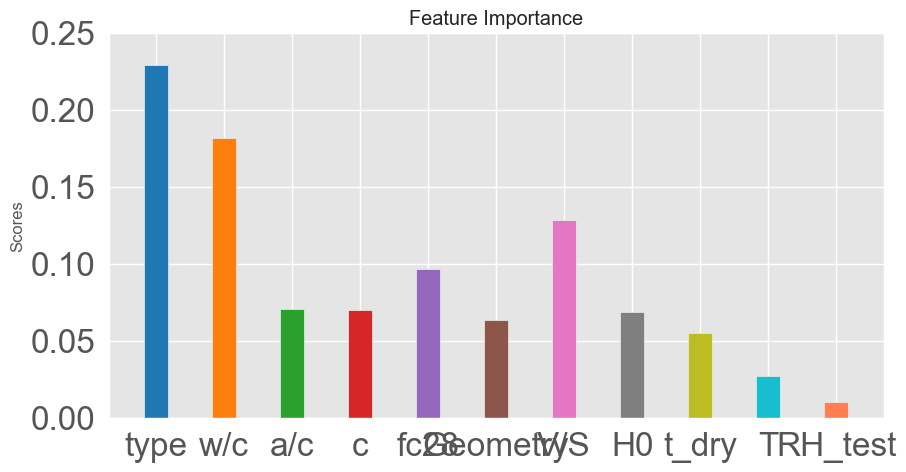

In [48]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(fe.features,abs(fe['Decision Tree Regressor']),width=0.35,
       color=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728', '#9467bd', '#8c564b','#e377c2',
              '#7f7f7f', '#bcbd22', '#17becf','coral','black'])

ax.set_ylabel('Scores')
plt.ylim(0, 0.25)
plt.title("Feature Importance")
plt.show()

In [89]:
fe = fe[fe.features != 'Geometry']

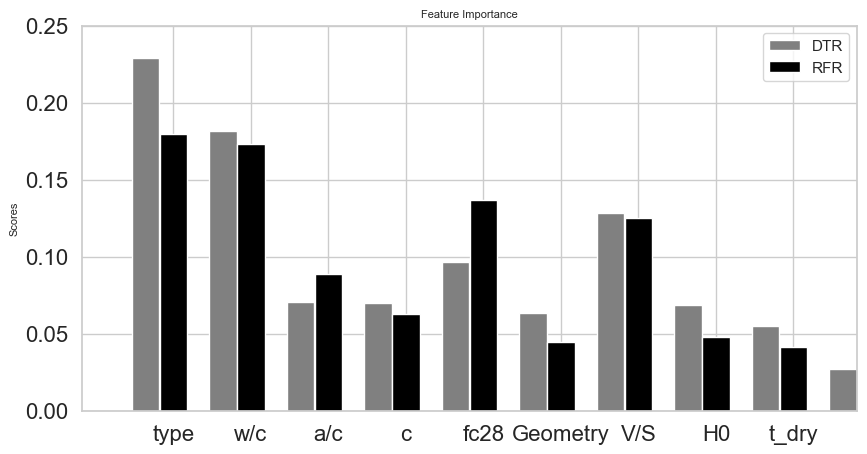

In [58]:
fig, ax = plt.subplots(figsize=(10, 5))
data_group1 = abs(fe['Decision Tree Regressor'])
data_group2 = abs(fe['Random Forest Regressor'])
x_vals = range(len(data_group1))
sns.set(style="whitegrid")

plt.bar([x-0.18 for x in x_vals], data_group1, width=0.35,color="grey")
plt.bar([x+0.18 for x in x_vals], data_group2, width=0.35,
       tick_label = fe.features,color='black')

plt.legend(["DTR", "RFR"], loc="upper right")
ax.set_ylabel('Scores', fontsize=8)
plt.ylim(0, 0.25)
plt.xlim(-1,9)
plt.title("Feature Importance", fontsize=8)
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.show()